<a href="https://colab.research.google.com/github/Sandhiyaa-Sree-J-P/Netflix_Data_Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

warnings.filterwarnings('ignore')
%matplotlib inline

In [14]:
df=pd.read_csv('netflix_titles.csv')

Inspecting the Dataset


In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [17]:
df.shape

(8807, 12)

In [18]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [22]:
df[df.duplicated()]   #to check row-wise and detect duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [26]:
df.drop_duplicates(inplace=True)  #to remove the duplicate rows permanently

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Inspecting Missing Values in the Dataset

In [23]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

<Axes: >

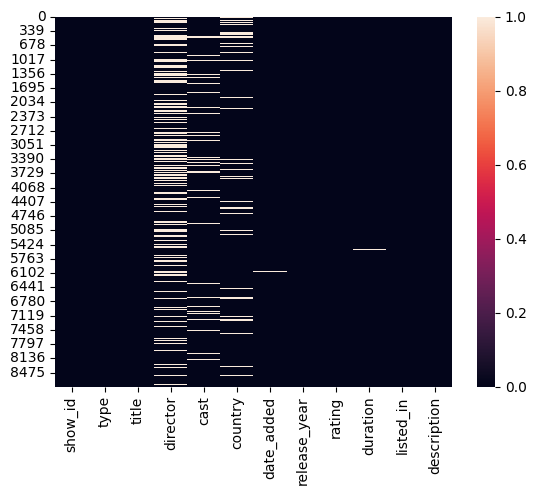

In [24]:
sns.heatmap(df.isnull())

In [34]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [25]:
df['director'].value_counts()     #univariate

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [26]:
df['director'].value_counts().head(20)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Quentin Tarantino          8
Ryan Polito                8
Troy Miller                8
Shannon Hartman            8
Fernando Ayllón            8
Name: director, dtype: int64

In [27]:
go.Figure(data=[go.Pie(
    labels=df['type'].value_counts(normalize=True).index,
    values=df['type'].value_counts(normalize=True).values,
    hole=0.5,
    title='Movies Vs TV Shows'
)])

In [28]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [29]:
df.rating.value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

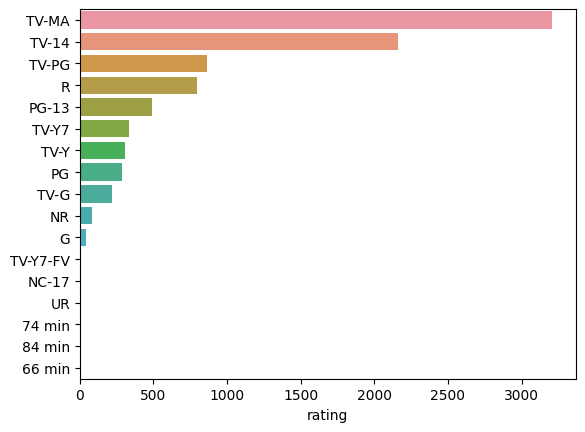

In [30]:
sns.barplot(x=df.rating.value_counts(), y=df.rating.value_counts().index, data=df, orient='h')
plt.show()

The highest count - TV-MA is the rating that shows that a program is intended for adults. 'MA' stands for 'Mature Audience'. Children aged 17 and under should not view these programs.

Second largest is the 'TV-14'. A TV-14 is meant for children above 14 years of age. It is generally not recommended to let children watch the program without parental attendance or atleast without then vetting it first. It can contain crude humour, the use of harmful subtance, strong language, violence and complex or upsetting themes.

Third largest is the very popular 'R' rating. 'R' is short for restricted, so any person under 17 should not watch.

In [31]:
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [32]:
df.country.value_counts().head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

Year-wise Count

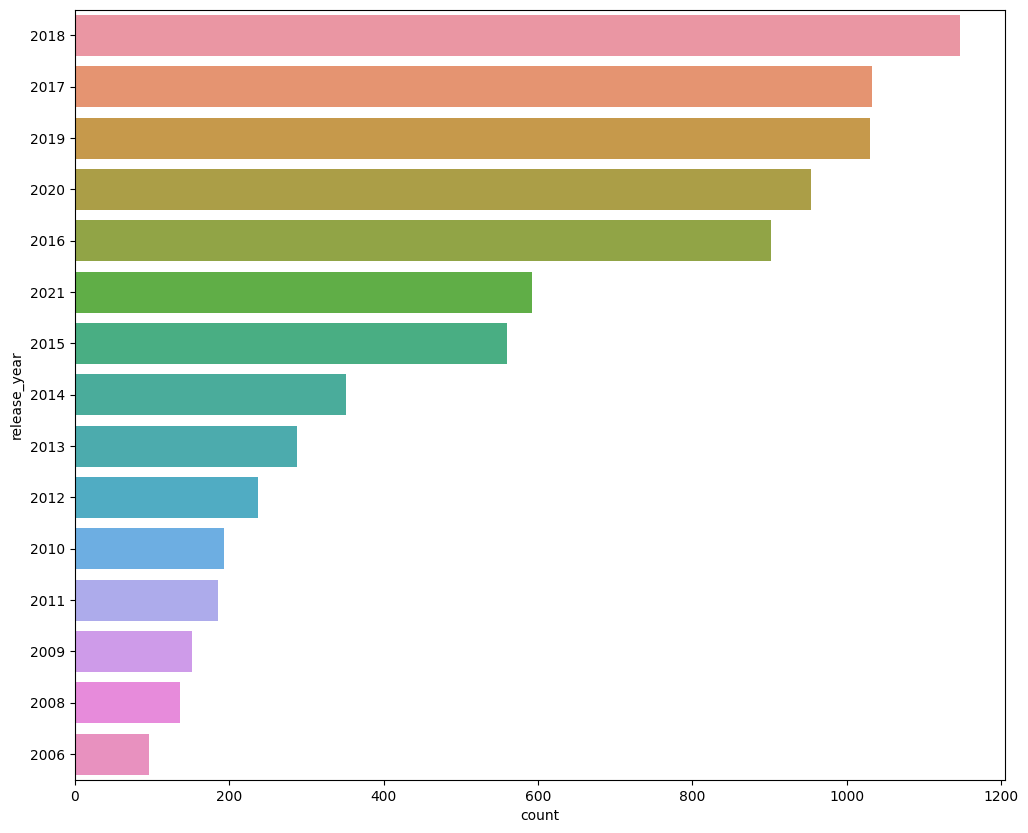

In [33]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y='release_year', data=df, order=df.release_year.value_counts().index[0:15])

Highest releases in 2018 followed by 2017 and 2019

In [34]:
#Top 10 directors

df.director.value_counts().head(10)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

In [35]:
df.listed_in.value_counts().tail()

Kids' TV, TV Action & Adventure, TV Dramas            1
TV Comedies, TV Dramas, TV Horror                     1
Children & Family Movies, Comedies, LGBTQ Movies      1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows    1
Cult Movies, Dramas, Thrillers                        1
Name: listed_in, dtype: int64

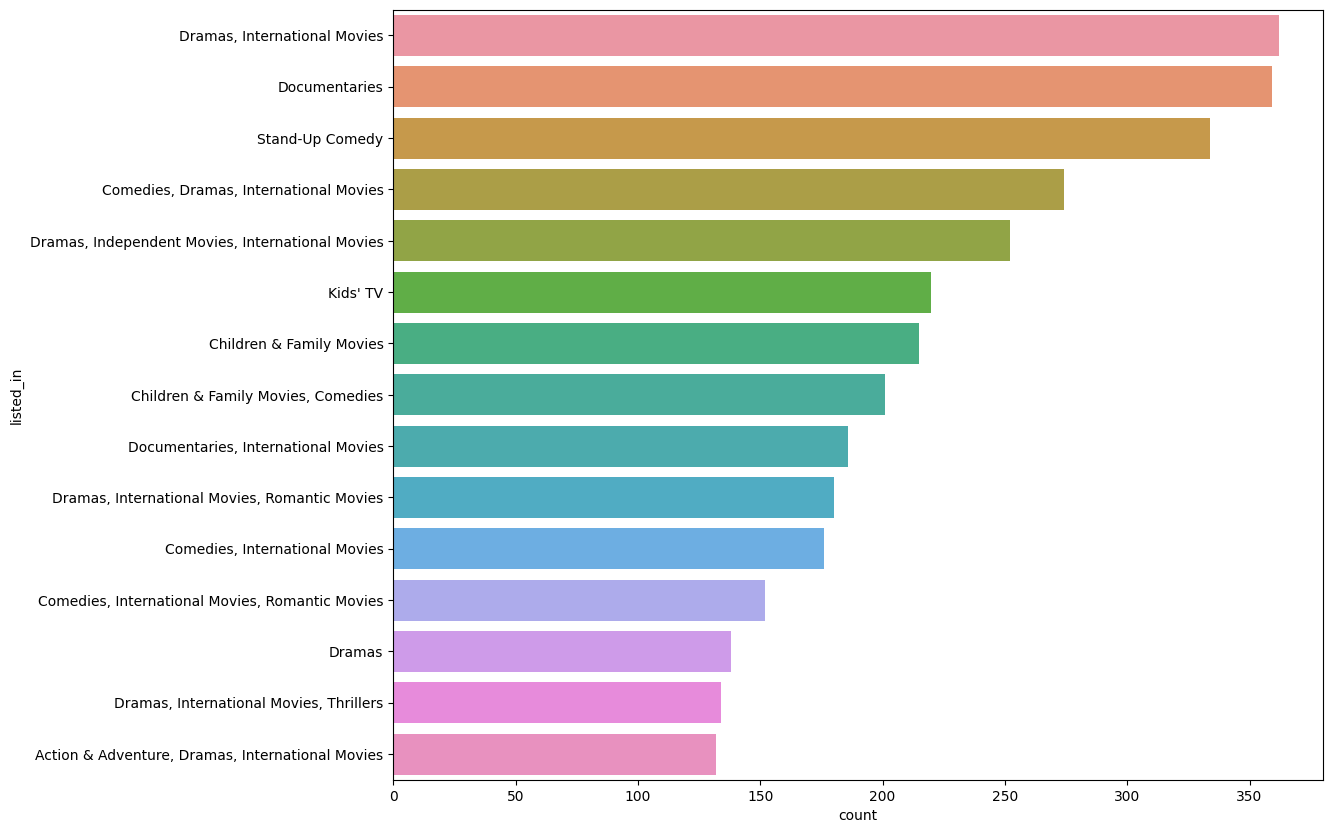

In [36]:
plt.figure(figsize=(12,10))
ax=sns.countplot(y='listed_in', data=df, order=df.listed_in.value_counts().index[0:15])

Handling Missing Values

In [37]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [38]:
round(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [39]:
#Dropping rows with small percentages of null values
df.dropna(subset=["rating","duration"],axis=0, inplace=True)

In [40]:
df.shape

(8800, 12)

In [41]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.90
country          9.43
cast             9.38
date_added       0.11
show_id          0.00
type             0.00
title            0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [42]:
df.dropna(subset=["date_added"], axis=0, inplace=True)

In [43]:
df.shape

(8790, 12)

In [44]:
#Replacing missing values in country with "Unknown"
df["country"].replace(np.NaN, "Unknown", inplace=True)

In [45]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [46]:
df.country.value_counts().head()

United States     2809
India              972
Unknown            829
United Kingdom     418
Japan              243
Name: country, dtype: int64

In [47]:
df.cast.value_counts().head()

David Attenborough                                                                         19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil    14
Samuel West                                                                                10
Jeff Dunham                                                                                 7
David Spade, London Hughes, Fortune Feimster                                                6
Name: cast, dtype: int64

In [50]:
#Replacing missing values in cast with "no cast"
df["cast"].replace(np.NaN, "No Cast", inplace=True)

In [51]:
#Replacing missing values in Directors with "No Director"
df["director"].replace(np.NaN, "No Director", inplace=True)

In [53]:
#Checking for missing values
round(df.isnull().sum()/df.shape[0]*100,4).sort_values(ascending=True)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [62]:
df['title']

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8790, dtype: object

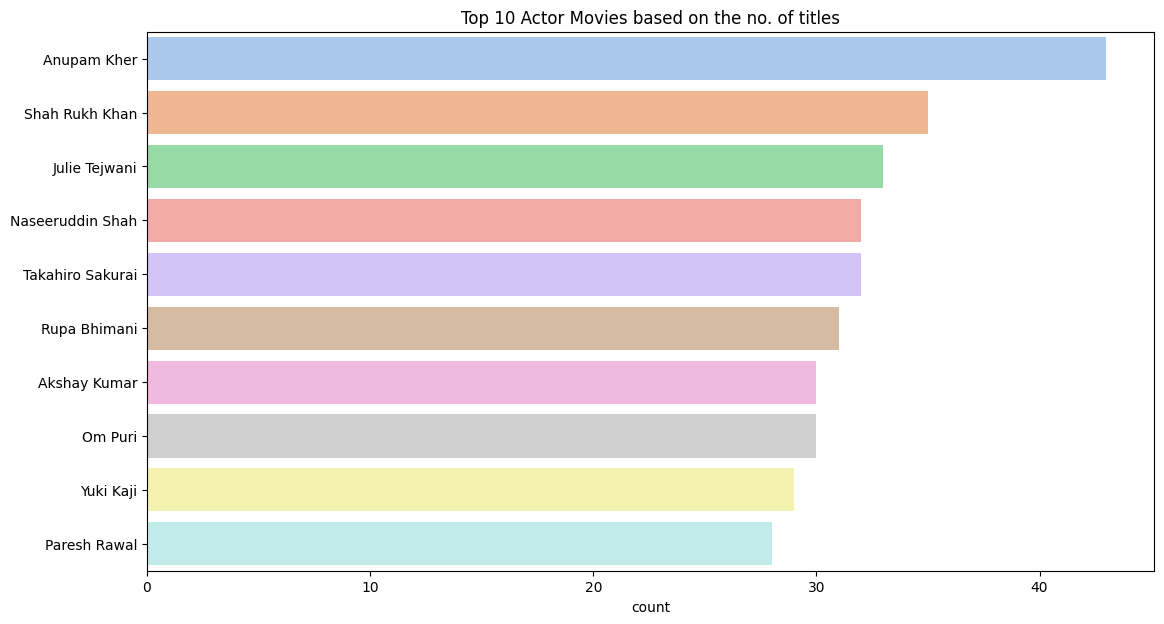

In [66]:
cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies based on the no. of titles')
sns.countplot(y=cast_shows, order=cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

In [68]:
movies_df=df.loc[(df['type']=="Movie")]
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [69]:
show_df=df.loc[(df['type']=="TV shows")]
show_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [70]:
movies_df.durations=movies_df.apply(lambda x: x.replace("min","")if 'min' in x else x)
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [84]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6126 non-null   object
 1   type          6126 non-null   object
 2   title         6126 non-null   object
 3   director      6126 non-null   object
 4   cast          6126 non-null   object
 5   country       6126 non-null   object
 6   date_added    6126 non-null   object
 7   release_year  6126 non-null   int64 
 8   rating        6126 non-null   object
 9   duration      6126 non-null   object
 10  listed_in     6126 non-null   object
 11  description   6126 non-null   object
dtypes: int64(1), object(11)
memory usage: 622.2+ KB


In [86]:
# movies_df.loc[:,["duration"]]=movies_df.loc[:,["duration"]].apply(lambda x: x.astype('int64',errors='ignore'))
# movies_df.describe()
movies_df['duration'] = pd.to_numeric(movies_df['duration'], errors='ignore')
movies_df.describe()

,release_year,duration
count,6126.000000,0.0
mean,2013.120144,NaN
std,9.681723,NaN
min,1942.000000,NaN
25%,2012.000000,NaN
50%,2016.000000,NaN
75%,2018.000000,NaN
max,2021.000000,NaN


In [72]:
#Shortest Movie
shortest_movie=movies_df.loc[(movies_df['duration']==np.min(movies_df.duration))]
shortest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3535,s3536,Movie,American Factory: A Conversation with the Obamas,No Director,"President Barack Obama, Michelle Obama, Julia ...",United States,"September 5, 2019",2019,TV-G,10 min,Documentaries,Barack and Michelle Obama talk with directors ...


In [73]:
#Longest Movie
longest_movie=movies_df.loc[(movies_df['duration']==np.max(movies_df.duration))]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
119,s120,Movie,Here and There,JP Habac,"Janine Gutierrez, JC Santos, Victor Anastacio,...",Unknown,"September 2, 2021",2020,TV-MA,99 min,"Dramas, International Movies, Romantic Movies",After meeting through a heated exchange on soc...
337,s338,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","August 1, 2021",2007,R,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
344,s345,Movie,My Girl 2,Howard Zieff,"Anna Chlumsky, Austin O'Brien, Dan Aykroyd, Ja...",United States,"August 1, 2021",1994,PG,99 min,"Children & Family Movies, Comedies, Dramas",A teen makes surprising discoveries when she t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8441,s8442,Movie,The Nutcracker and the Four Realms,"Lasse Hallström, Joe Johnston","Mackenzie Foy, Keira Knightley, Helen Mirren, ...",United States,"May 28, 2019",2018,PG,99 min,Children & Family Movies,"When her late mother gifts her a key, Clara em..."
8497,s8498,Movie,The Sapphires,Wayne Blair,"Chris O'Dowd, Deborah Mailman, Jessica Mauboy,...",Australia,"April 26, 2019",2012,PG-13,99 min,"Comedies, Dramas, Independent Movies","Sisters Gail, Cynthia and Julie have talent, b..."
8540,s8541,Movie,The Tuxedo,Kevin Donovan,"Jackie Chan, Jennifer Love Hewitt, Jason Isaac...",United States,"November 1, 2019",2002,PG-13,99 min,"Action & Adventure, Comedies","After a government spy is hospitalized, New Yo..."
8625,s8626,Movie,Tremors 5: Bloodline,Don Michael Paul,"Michael Gross, Jamie Kennedy, Ernest Ndhlovu, ...","South Africa, United States","January 1, 2020",2015,PG-13,99 min,"Comedies, Horror Movies, Sci-Fi & Fantasy",When he is hired to capture a deadly creature ...


In [82]:
longest_movies=movies_df.loc[(movies_df['duration']>=100)]
longest_movies

TypeError: ignored

In [80]:
show_df.duration=show_df.duration.apply(lambda x: x.replace("Season","")if 'season'in x else x)
show_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       0 non-null      object
 1   type          0 non-null      object
 2   title         0 non-null      object
 3   director      0 non-null      object
 4   cast          0 non-null      object
 5   country       0 non-null      object
 6   date_added    0 non-null      object
 7   release_year  0 non-null      int64 
 8   rating        0 non-null      object
 9   duration      0 non-null      object
 10  listed_in     0 non-null      object
 11  description   0 non-null      object
dtypes: int64(1), object(11)
memory usage: 0.0+ bytes


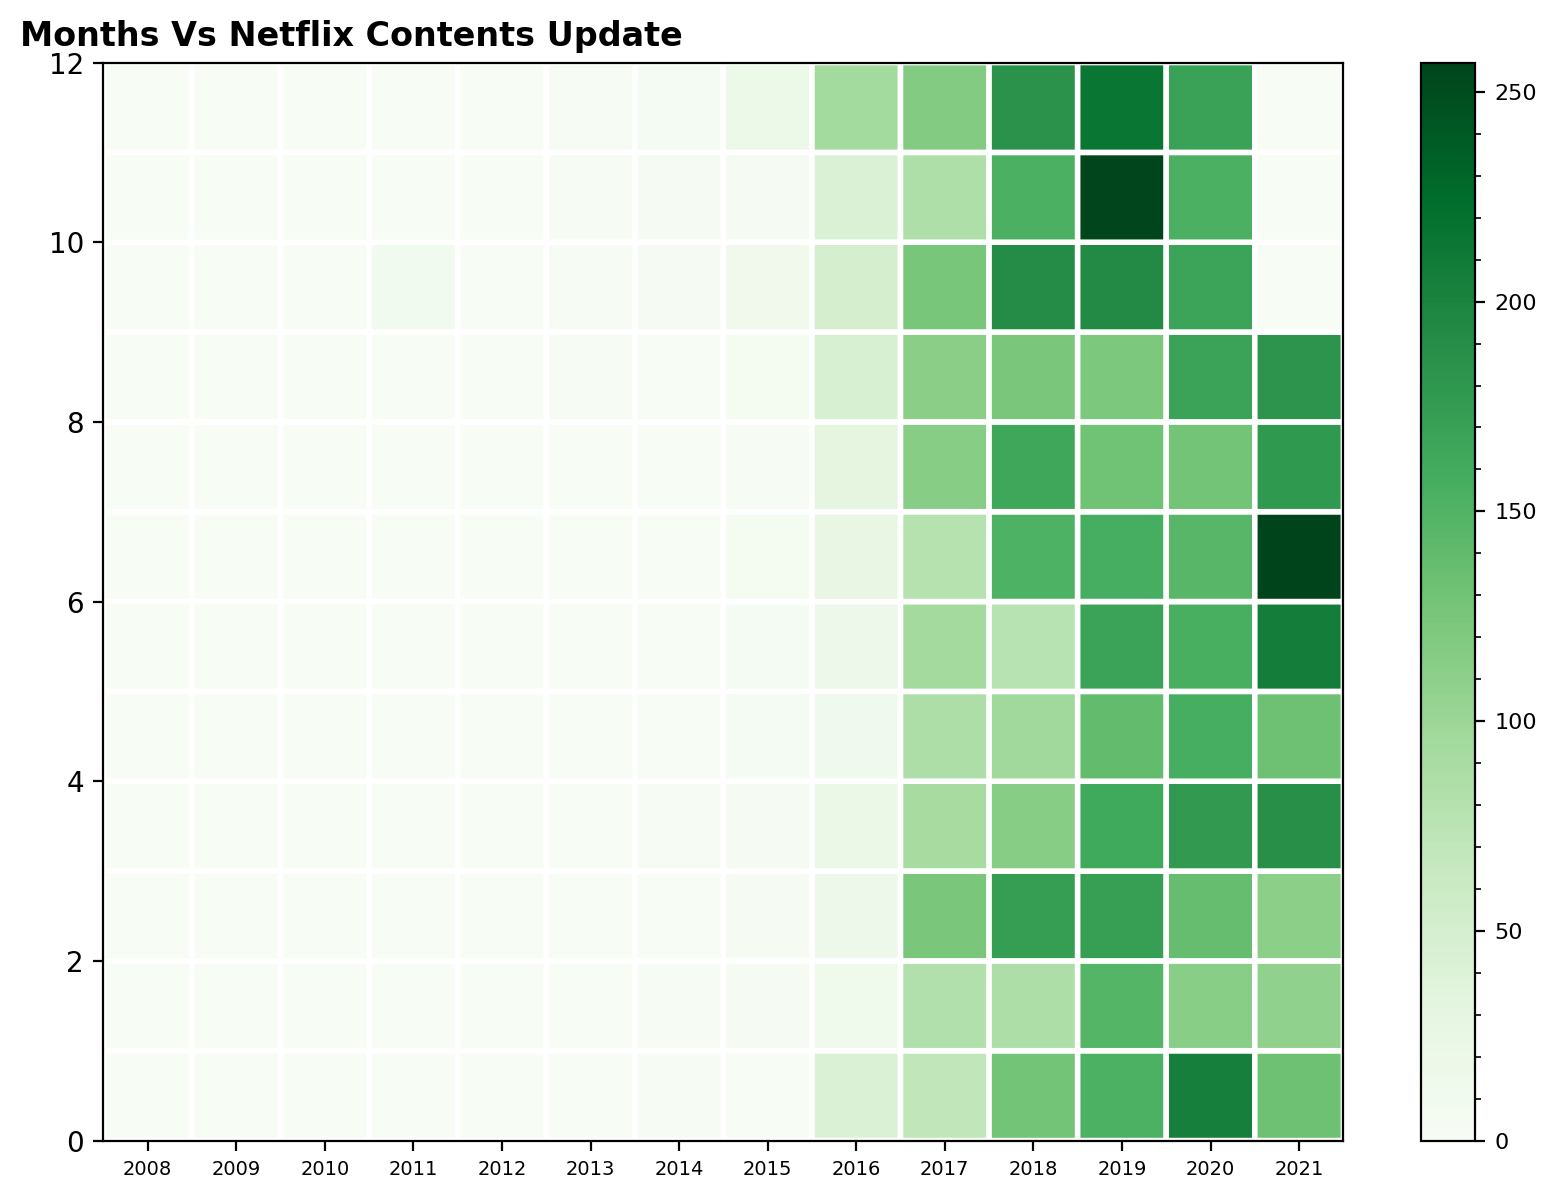

In [89]:
netflix_data = df[['date_added']].dropna()
netflix_data['year'] = netflix_data['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_data['month'] = netflix_data['date_added'].apply(lambda x: x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
new_df = netflix_data.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(new_df, cmap='Greens', edgecolors='White', linewidths=2)  # heatmap
plt.xticks(np.arange(0.5, len(new_df.columns), 1), new_df.columns, fontsize=7, fontfamily='calibri')

plt.title('Months Vs Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0 + 0.2))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()
